## Анализ Sales Product Data с сайта Kaggle  
https://www.kaggle.com/datasets/knightbearr/sales-product-data  

**Таблица состоит из следующих столбцов:**  
+ **Order ID** - Идентификатор заказа — это система счисления, которую Amazon использует исключительно для отслеживания заказов. Каждый заказ получает свой идентификатор заказа, который не будет дублироваться. .  
+ **Product** - Товар, который был продан.  
+ **Quantity Ordered** - Заказанное количество — это общее количество заказанного товара в первоначальном заказе.  
+ **Price Each** - Цена каждого продукта.  
+ **Order Date** - Дата, когда клиент запрашивает отправку заказа.  
+ **Purchase Address** - Адрес доставки.  

#### Необходимо ответить на следующие вопросы:
1. Какой год был лучшим для продаж? Сколько было заработано в этом году?
2. Какой месяц был лучшим для продаж? Сколько было заработано в этом месяце?
3. В каком городе было наибольшее количество продаж?
4. В какое время мы должны показывать рекламу, чтобы максимизировать вероятность того, что клиент купит продукт?
5. Какие продукты чаще всего продаются вместе?
6. Какой товар продается больше всего? Как вы думаете, почему он продается больше всего?
7. Какова вероятность того, что следующие люди закажут зарядный кабель USB-C?
8. Какова вероятность того, что следующие люди закажут iPhone?
9. Какова вероятность того, что следующие люди закажут Google Phone?
10. Насколько вероятно, что другие люди будут заказывать проводные наушники?

## Импорт библиотек

In [1]:
#импортируем необходимые библиотеки
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Парсинг файлов-источников

In [2]:
#создаем пустой df
df = pd.DataFrame()

In [3]:
#читаем архив
zf = zipfile.ZipFile(r'source\archive.zip')

In [4]:
#для каждого файла в списке файлов, содержащихся в архиве:
for file in zf.namelist():
    df_from_zip = pd.read_csv(zf.open(file)) #откроем файл и прочитаем его с помощью pandas
    print(df_from_zip.shape)                 #выведем количество строк и столбцов в файле
    df = pd.concat([df, df_from_zip])        #добавим файл в общий df

(18383, 6)
(12011, 6)
(25117, 6)
(12036, 6)
(9723, 6)
(14371, 6)
(13622, 6)
(15226, 6)
(16635, 6)
(17661, 6)
(20379, 6)
(11686, 6)


## Предобработка данных

In [5]:
df.info() #основная информация о df: столбцы, количество непустых значений, типы столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
df.isnull().sum() #количество пустых значений в каждом столбце

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df = df.dropna() #удалим все пустые строки
df.shape         #осталось 186305 строк, что соответсвует числу из метода info()

(186305, 6)

In [8]:
df.isnull().sum() #пустых значений не осталось

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
#переименуем столбцы, так как в них есть пробелы
df.rename(columns = {'Order ID':'id',
                     'Product':'product',
                     'Quantity Ordered':'quantity',
                     'Price Each':'price',
                     'Order Date':'date',
                     'Purchase Address':'address'}, inplace = True)

In [10]:
#взглянем на первые 5 строк в df
df.head() #видно, что столбец quantity содержит целые числа
          #столбец price содержит числа с точкой
          #столбец date содержит даты

,id,product,quantity,price,date,address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


переведем с столбец quantity в тип int

df['quantity'] = df['quantity'].astype(int)

Но получим ошибку ValueError: invalid literal for int() with base 10: 'Quantity Ordered'
Это значит, что данные включают значения, которые нельзя интерпретировать как числа

In [11]:
#взглянем на строку, у которой в столбце quantity есть текст 'Quantity Ordered'
df[(df.quantity == 'Quantity Ordered')]

,id,product,quantity,price,date,address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
#судя по всему, в данных встречаются строки-заголовки
#это может быть связано с неправильным объединением мелких выборок/выгрузок в одну
#удалим эти строки
df = df[(df.quantity != 'Quantity Ordered')]

In [13]:
#оценим наш массив данных методом value_counts()
#видно, что больше строк-заголовков нет
#также видно, что в выборке присутсвуют строки-дубли
df.value_counts()

id      product                     quantity  price   date            address                               
288995  Wired Headphones            1         11.99   11/04/19 23:58  552 Lincoln St, Portland, OR 97035        2
201606  AA Batteries (4-pack)       1         3.84    05/02/19 14:07  309 Main St, Seattle, WA 98101            2
256196  USB-C Charging Cable        1         11.95   09/27/19 21:09  253 6th St, Boston, MA 02215              2
315204  Wired Headphones            1         11.99   12/12/19 12:41  680 6th St, San Francisco, CA 94016       2
174972  USB-C Charging Cable        1         11.95   03/26/19 23:02  389 10th St, New York City, NY 10001      2
                                                                                                               ..
200687  Lightning Charging Cable    1         14.95   05/11/19 11:31  878 7th St, Atlanta, GA 30301             1
200688  27in 4K Gaming Monitor      1         389.99  05/22/19 10:31  731 Wilson St, Los Ange

In [14]:
#продолжим преобразование столбцов к правильным типам
df['quantity'] = df['quantity'].astype('int')
#можно так
df['price'] = pd.to_numeric(df['price'])
df['date'] = pd.to_datetime(df['date'])

In [15]:
#правильные типы
df.dtypes

id                  object
product             object
quantity             int32
price              float64
date        datetime64[ns]
address             object
dtype: object

In [16]:
#займемся дубликатами
#в рамках одной транзакции (id) может быть куплено несколько видов разной продукции и они будут записаны в разные строки
#но несколько единиц одной и той же продукции в рамках одной транзакции будут учитываться одной строкой в столбце quantity
#следовательно, дубликатами нужно считать только полное дублирование всей строки 
df.drop_duplicates(inplace = True)

In [17]:
#задублированных строк не осталось
df.value_counts()

id      product                     quantity  price   date                 address                               
141234  iPhone                      1         700.00  2019-01-22 21:25:00  944 Walnut St, Boston, MA 02215           1
260170  27in 4K Gaming Monitor      1         389.99  2019-10-08 12:31:00  275 Sunset St, Los Angeles, CA 90001      1
260172  Bose SoundSport Headphones  1         99.99   2019-10-16 21:03:00  636 Elm St, Boston, MA 02215              1
260173  20in Monitor                1         109.99  2019-10-26 11:38:00  350 Washington St, Boston, MA 02215       1
260174  USB-C Charging Cable        1         11.95   2019-10-16 09:22:00  889 Maple St, Austin, TX 73301            1
                                                                                                                    ..
200646  USB-C Charging Cable        2         11.95   2019-05-30 10:39:00  856 West St, San Francisco, CA 94016      1
200647  Lightning Charging Cable    1         14.95  

In [18]:
df.head()

,id,product,quantity,price,date,address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


## Выполнение аналитических задач

#### 1. Какой год был лучшим для продаж? Сколько было заработано в этом году?

In [19]:
#создадим столбец, содержащий год, выделенный из даты продажи
df['year'] = df.date.dt.year

In [20]:
#рассчитаем для каждой продажи общую сумму
df['amount'] = df['price'] * df['quantity']

In [21]:
#строим сводную таблицу
pd.pivot_table(df,
               index = 'year',
               values = ['quantity', 'amount'],
               aggfunc=sum)\
  .reset_index()

,year,amount,quantity
0,2019,34456867.65,208771
1,2020,8670.29,41


**Ответ:** лучший год для продаж был 2019. Было продано 208 771 ед. товаров на общую сумму 34 456 867.65$

#### 2. Какой месяц был лучшим для продаж? Сколько было заработано в этом месяце?

In [22]:
#создадим столбец, содержащий месяц, выделенный из даты продажи
df['month'] = df.date.dt.month

In [23]:
#строим сводную таблицу
pd.pivot_table(df,
               index = ['year', 'month'],
               values = ['quantity', 'amount'],
               aggfunc=sum)\
  .reset_index()\
  .sort_values('quantity', ascending = False)\
  .head(3)

,year,month,amount,quantity
11,2019,12,4608295.70,28074
9,2019,10,3734777.86,22669
3,2019,4,3389217.98,20536


**Ответ:** лучший месяц для продаж был декабрь 2019 года. Было продано 28 074 ед. товаров на общую сумму 4 608 295.70  Возможно, это связано с тем, что в декабре совершается большое количество покупок в преддверии нового года

#### 3. В каком городе было наибольшее количество продаж?

In [24]:
#выделим из адреса только города в отдельный столбец
df['city'] = df.address.apply(lambda x: x.split(', ')[1])

In [25]:
#строим сводную таблицу
pd.pivot_table(df,
               index = ['city'],
               values = ['quantity', 'amount'],
               aggfunc=sum)\
  .reset_index()\
  .sort_values('quantity', ascending = False)\
  .head(3)

,city,amount,quantity
7,San Francisco,8254743.55,50169
4,Los Angeles,5448304.28,33247
5,New York City,4661867.14,27903


**Ответ:** В Сан-Франциско было наибольшее количество продаж: было продано 50 169 ед. товара на общую сумму 8 254 743.55$

#### 4. В какое время мы должны показывать рекламу, чтобы максимизировать вероятность того, что клиент купит продукт?

In [26]:
#выделим из даты покупки время
df['purchase_hour'] = df.date.dt.hour

In [27]:
#строим сводную таблицу
ad_hours = pd.pivot_table(df,
               index = ['purchase_hour'],
               values = ['quantity'],
               aggfunc=sum)\
             .sort_values('purchase_hour')

Text(0, 0.5, 'Количество продаж')

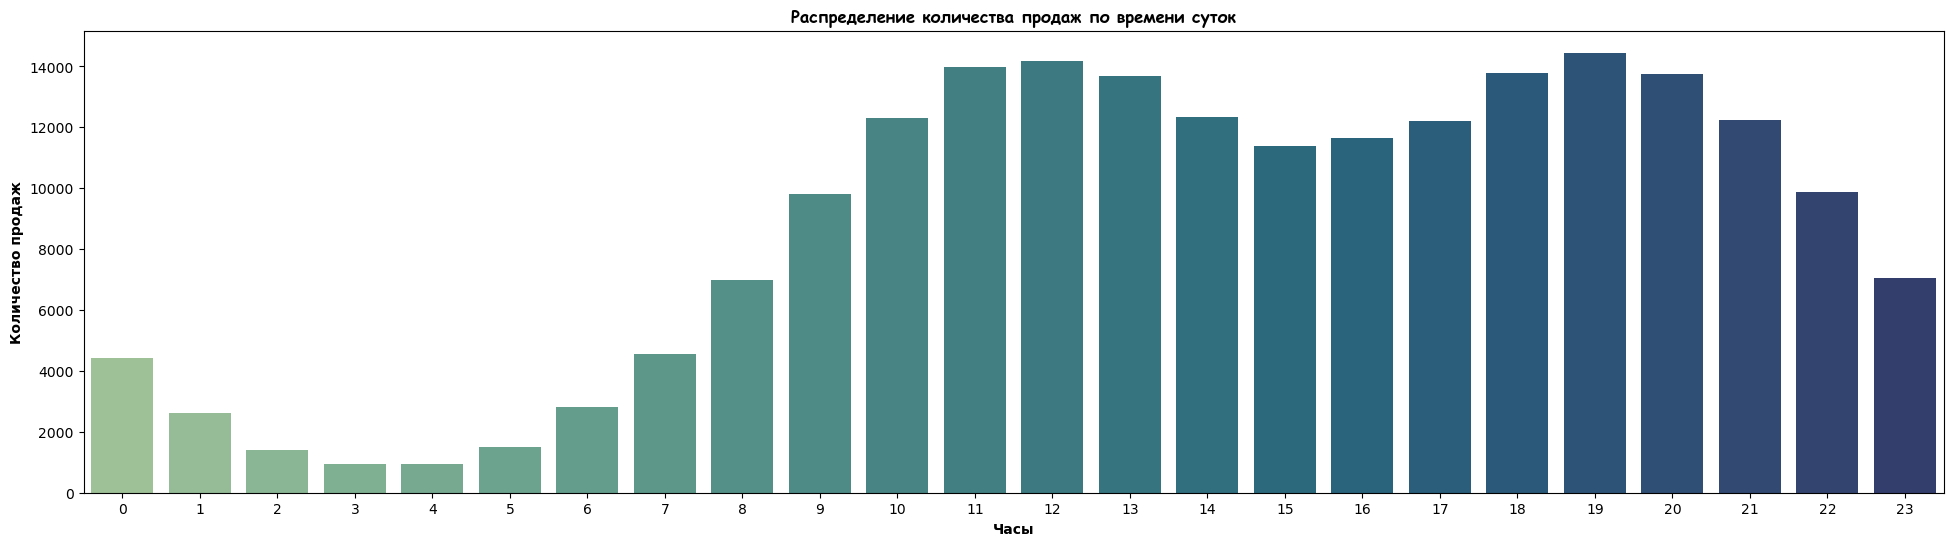

In [28]:
#выводим данные сводной таблицы на график
plt.figure(figsize = (24, 6))

sns.barplot(data = ad_hours, x = ad_hours.index, y = ad_hours['quantity'], palette = 'crest')

plt.title('Распределение количества продаж по времени суток', fontname = 'cursive', weight = 'bold')
plt.xlabel('Часы', weight = 'bold')
plt.ylabel('Количество продаж', weight = 'bold')

**Ответ:** на графике видно, что за сутки максимальное количество продаж приходится на 11-13 часов утра и 18-20 часов вечера.  
    Возможно, это связано с тем, что существенная часть клиентов совершает покупки в свободное от работы обеденное время и  
    вечером, уже находясь дома. Следовательно, целесообразно показывать рекламу в эти два временных промежутка

#### 5. Какие продукты чаще всего продаются вместе?

In [29]:
#группируем по id и получаем перечень всех заказанных товаров по каждому id и количество уникальных позиций
big_orders = df.groupby('id', as_index = False)\
               .agg({'product':[set, 'count']})
#убираем мультииндексы в заголовках столбцов
big_orders.columns = [tup[1] if tup[1] else tup[0] for tup in big_orders.columns]
#выводим только те id, у которых позиций в заказе больше 1
big_orders = big_orders.query('count > 1')

In [30]:
#переведем set из множества в список и отсортируем каждый список
big_orders['set'] = big_orders['set'].apply(list, sorted)

In [31]:
#подсчитаем количество одинаковых комбинаций товаров в корзине
big_orders.set.value_counts().head(10)

[Lightning Charging Cable, iPhone]                   895
[USB-C Charging Cable, Google Phone]                 869
[Wired Headphones, iPhone]                           361
[USB-C Charging Cable, Vareebadd Phone]              318
[Google Phone, Wired Headphones]                     311
[Apple Airpods Headphones, iPhone]                   299
[Google Phone, Bose SoundSport Headphones]           169
[Vareebadd Phone, Wired Headphones]                  110
[Lightning Charging Cable, AA Batteries (4-pack)]    103
[USB-C Charging Cable, Lightning Charging Cable]      96
Name: set, dtype: int64

**Ответ:** чаще всего в одной корзине оказывались товары Lightning Charging Cable и iPhone (886 раз), а также USB-C Charging Cable и Google Phone (869 раз). Это логично: покупаешь смартфон - купи и запасной кабель (соответсвующего типа).  
Также часто заказывают беспроводные наушники в комплекте со смартфоном (374 раза с iPhone и 311 раз с Google Phone)

#### 6. Какой товар продается больше всего? Как вы думаете, почему он продается больше всего?

In [32]:
#сгруппируем по наименованию товара и рассчитаем количество проданных штук
best_products = df.groupby('product', as_index = False)\
                 .agg({'quantity':'sum', 'price': 'mean'})\
                 .sort_values('quantity', ascending = False)
best_products

,product,quantity,price
5,AAA Batteries (4-pack),30986,2.99
4,AA Batteries (4-pack),27615,3.84
15,USB-C Charging Cable,23931,11.95
12,Lightning Charging Cable,23169,14.95
17,Wired Headphones,20524,11.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
2,27in FHD Monitor,7541,149.99
18,iPhone,6847,700.00
1,27in 4K Gaming Monitor,6239,389.99


In [33]:
#посмотрим на корреляцию цены товара и количества проданных штук
best_products.corr()

,quantity,price
quantity,1.000000,-0.601297
price,-0.601297,1.000000


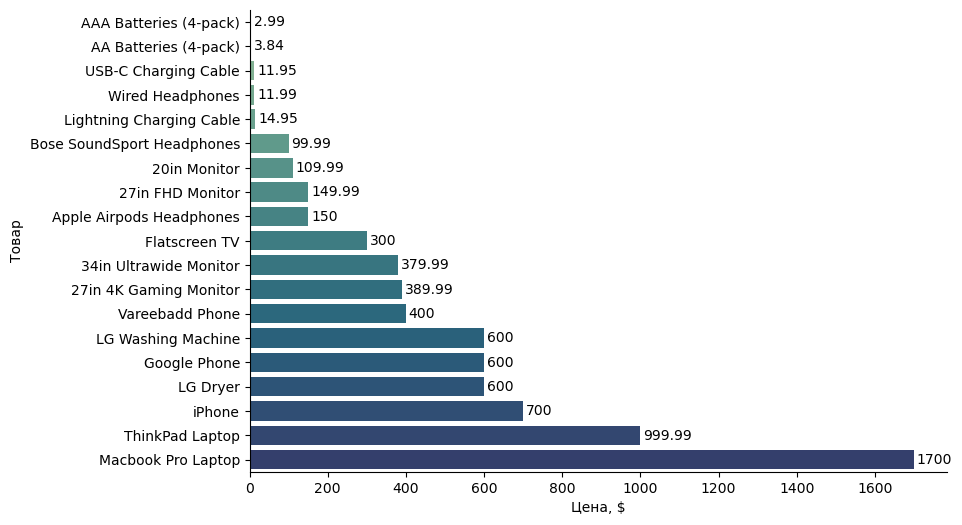

In [34]:
#область построения 11х6
plt.figure(figsize=(9,6))
products_prices = best_products[['product', 'price']].sort_values('price')
ax = sns.barplot(data=products_prices,
                 x="price",
                 y='product',
#                  ci= None, #отключаем линию погрешности
#                  log=True, #используем log=True, чтобы отобразить регионы с малым объемом
                 palette = 'crest') #задаем цвет
ax.set(xlabel= 'Цена, $',
       ylabel= 'Товар')
#подписи значений столбцов, padding задает расстояние от вершины, fmt устанавливает формат - округление до целых
ax.bar_label(ax.containers[0], padding = 2)
sns.despine()

Коэффициент -0,6 означает, что между двумя переменными есть сильная отрицательная корреляция. Следовательно, чем меньше цена, тем большее количество проданных единиц товара можно ожидать.

**Ответ:** больше всего было продано ААА батареек (комплект из 4 шт.) - 30986 упаковок.  
Это связано с низкой ценой этого товара, а также с тем, что самые распространенные формы батареек - это AAA и АА (на втором месте в рейтинге самых продаваемых товаров)

#### 7. Какова вероятность того, что клиент закажет зарядный кабель USB-C?

In [35]:
#определим, сколько было всего заказов
uniq_id = df.id.nunique()
uniq_id

178437

In [36]:
#определим, сколько заказов содержали зарядный кабель USB-C
usbc_uniq_id = df.query('product == "USB-C Charging Cable"').id.nunique()
usbc_uniq_id

21855

In [37]:
#вычислим вероятность того, что клиент закажет зарядный кабель USB-C
round(usbc_uniq_id / uniq_id * 100, 2)

12.25

**Ответ:** Вероятность того, что клиент закажет зарядный кабель USB-C составляет 12.25%

#### 8. Какова вероятность того, что клиент закажет iPhone?

In [38]:
#определим, сколько заказов содержали зарядный кабель USB-C
ip_uniq_id = df.query('product == "iPhone"').id.nunique()
ip_uniq_id

6840

In [39]:
#вычислим вероятность того, что клиент закажет iPhone
round(ip_uniq_id / uniq_id * 100, 2)

3.83

**Ответ:** Вероятность того, что клиент закажет iPhone составляет 3.83%

#### 9. Какова вероятность того, что клиент закажет Google Phone?

In [40]:
#определим, сколько заказов содержали зарядный кабель Google Phone
gp_uniq_id = df.query('product == "Google Phone"').id.nunique()
gp_uniq_id

5522

In [41]:
#вычислим вероятность того, что клиент закажет iPhone
round(gp_uniq_id / uniq_id * 100, 2)

3.09

**Ответ:** Вероятность того, что клиент закажет Google Phone составляет 3.09%

#### 10. Какова вероятность того, что клиент закажет Проводные наушники?

In [42]:
#определим, сколько заказов содержали зарядный кабель Google Phone
wh_uniq_id = df.query('product == "Wired Headphones"').id.nunique()
wh_uniq_id

18847

In [43]:
#вычислим вероятность того, что клиент закажет iPhone
round(wh_uniq_id / uniq_id * 100, 2)

10.56

**Ответ:** Вероятность того, что клиент закажет Проводные наушники составляет 10.56%